- 입력 feature (x)
- 가중치 (w)
- bias (b)
- forward propagation
- bac propagation 

https://m.blog.naver.com/samsjang/221033626685

# Back_Propagation(역전파)
- 신경망을 학습시킬때 이용하는 알고리즘
- 출력값과 정답의 오차를 네트워크에서 역전파시켜 네트워크의 가중치와(w) bias를 최적화 시킴
- Forward propagation(순전파)로 얻은 출력값과 정답과의 오차를 하나씩 층을 거슬러 올라가면서 역방향으로 전파
- 이 때 전파시킨 오차에 근거해 각 층의 가중치와 bias의 수정량을 계산
- 모든 층의 가중치와 bias를 조금씩 수정
- 위과정을 반복하면 네트워크가 최적화 (학습)

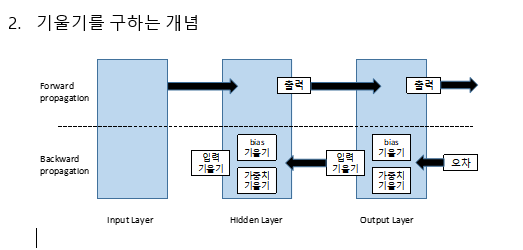

# 역전파 이해를 위한 개념
1. 훈련 데이터, 테스트 데이터 (Train & Test Data)
2. 손실 함수 (Loss Function)
3. 경사 하강법 (Gradient Descent)
4. 최적화 알고리즘
5. Batch

# 1. Train Data & Test Data
- train data : 신경망 학습에 이용 
- test data : 학습 결과의 검증에 사용 
- 각 데이터는 여려개의 입력값(feature)과 정답으로 구성 

- 입력값(feature) + 정답(target) =  sample 
- 일반적으로 train data 수 > test data 수 
- train data 로 학습이 제대로 된 경우 => test data 에서 좋은 결과 
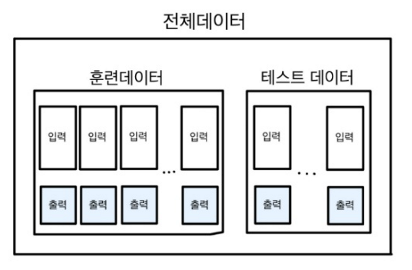

In [1]:
# !pip install IPython 
from IPython.display import Image

# ![nn](8.2.regression.png) - markdown에서 이미지 삽입  OR drag & drop (markdown상태)
# Image("img/picture.png") - code 에서 

# Regression (회귀)
![nn](8.2.regression.png)
- 여러 개의 값을 가진 벡터로 나타냄 

# Classification (분류)
![nn](8.2.classification.png)
- one hot incoding
- 출력값 t , 정답 y 

# 2. Loss Function (손실 함수)
- 출력값과 정답(target)의 오차를 정의하는 함수 

 ## 2.1 MSE (Mean Squared Error : 평균 제곱 오차) = 비용함수(cost function)
        - 주로 회귀문제에 사용
        - 1/n
        - n은 샘플 갯수, Yk,Tk 는 각각 자료의 라벨값과 예측값을 의미. 
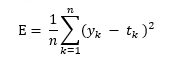
       

In [2]:
import numpy as np 

def mse(y,t):
    return np.sum(np.power(y - t, 2)) / y.shape[0]


## 2.2 SSE (Sum of Squared for Error) 
        - 주로 회귀문제에 사용 
        - 1/2
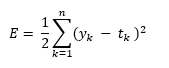

In [3]:
def square_sum(y,t):
    return 1.0/2.0 * np.sum(np.square(y - t))

## 2.3 Cross Entropy (교차 엔트로피)
        - 분류 문제에 사용 
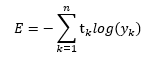

        - 이와 같이 변경 
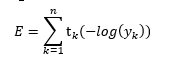

        - 분류문제에서 정답은 1 하나이고 나머지는 모두 0 인 one hot incoding vector로 표현 
        - 따라서 우변의 시그마 내부에서 Tk가 1인 항의 오차에만 영향을 줌
        - y = -log(x)

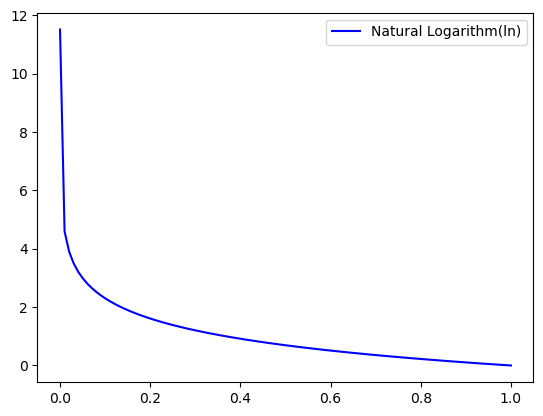

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(start=0.00001, stop=1.0, num=100)
plt.plot(x, -np.log(x), 'b-', label='Natural Logarithm(ln)')
plt.legend()
plt.show()

- x=1 => 0, x=0에 근접 => 무한대로 커짐 
- 즉, 정답에 가까울수록 => 전체 오차값은 작아짐
- 정답에서 멀어질수록 => 오차값은 무한대로 커짐 
- 교차 엔트로피의 장점 : 하나의 출력값과 정답의 차이가 클수록 => 학습 속도가 빨라짐 

In [5]:
def cross_entropy(y,t):
    return - np.sum(t * np.log(y + 1e-7))

- log함수의 진수 부분이 0 => 무한대로 발산, 계산 X => 방지하지 위해 1e-7 씀

http://www.incodom.kr/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95
https://blog.naver.com/dkdlel531/221463588157

# 3. Gradient Descent (경사 하강법)
- 학습률과 손실함수(Loss Function)의 순간기울기(gradient)를 이용하여 가중치(weight)를 업데이트하는 방법 
- MSE/비용함수를 최소화하기 위해 반복해서 파라미터를 조정해 나가는 것
- 
- 산 위에서 길을 잃었을 때 가장 빨리 골짜기로 내려가는 방법은 경사가 가파른 곳으로 내려가는 것이 가장 베스트 아이디어다. 이것이 바로 경사하강법의 원리이다. 
- 기울기가 가파른 방향으로 내려가면서 기울기가 0이 되는 지점까지 가는 방법이다. 기울기가 0이 된다면 골짜기의 최솟값에 도달한 것


- 미분의 기울기를 이용하여 도표의 오차들을 비교하고 오차를 최소화하는 방향으로 이동
- 일차함수식 y = wx + b라면, 최적의 w와 b를 찾아내는 것이 선형회귀의 목표이다. 
- 이 최적의 w와 b를 찾기 위해 우리는 경사 하강법을 이용한다.
- 
- 컴퓨터 - 상관관계 -> 선형으로 데이터를 모델링 예측 어려움 
- => 그래서 사람들은 컴퓨터에게 경사 하강법이란 기법을 학습
- => 먼저 w,b에 임의의 값을 넣은 일차함수와 자료값 사이의 MSE 를 구한다.
- => 이제 컴퓨터의 목표는 비용함수값이 최소가 되는 w와 b를 찾는 것이다. 즉, 실제값과 예측값의 오차를 최소화하는 과정이다. 이 비용함수는 오차가 벌어질 수록 제곱으로 인해 급증하게 되므로 2차 함수 형태
- α = Learning rate (학습률) = 사용자 지정 방식
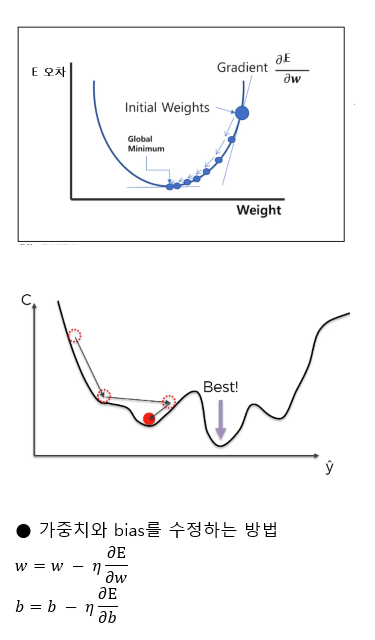

- 여러 변수에 대한 함수의 편미분이라는 것은 =
여러 변수들 중 하나에 대해서 미분하고, 
나머지는 상수로 취급하는 것
-  z = f(x, y, ...)에 대해서, z를 x에 대해서 편미분 

# 4. 최적화 알고리즘
# 5. Batch 
- 행렬 연산

# 출력층

In [10]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        # wb_width = 0.01 가중치와 편향 설정을 위한 정규분포의 표준편차
        
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u # 항등함수
        
        
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# 은닉층 



In [11]:
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) # 시그모이드
        
        
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [12]:
import matplotlib.pyplot as plt
import numpy as np

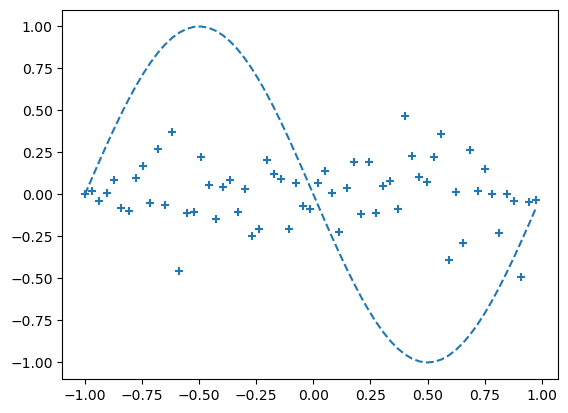

Epoch:0/2001 Error:0.2813676933877922


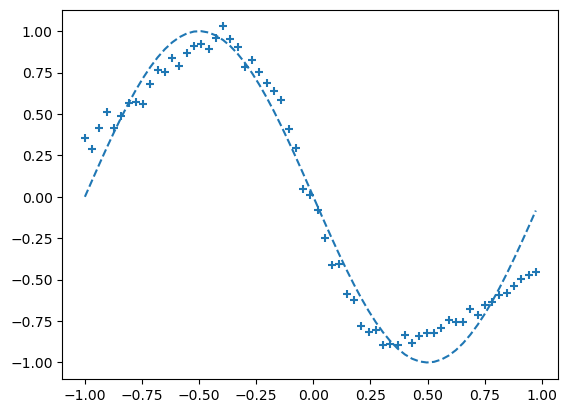

Epoch:200/2001 Error:0.009394873300207846


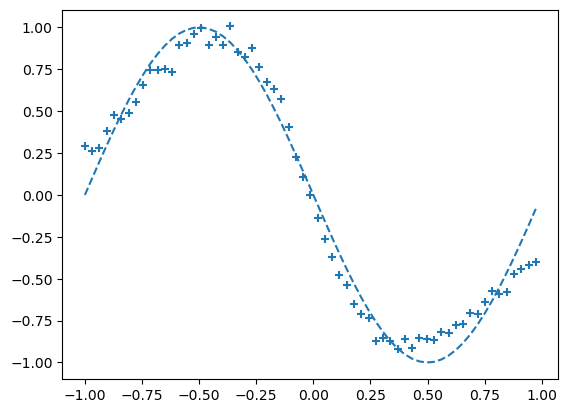

Epoch:400/2001 Error:0.006423195775719857


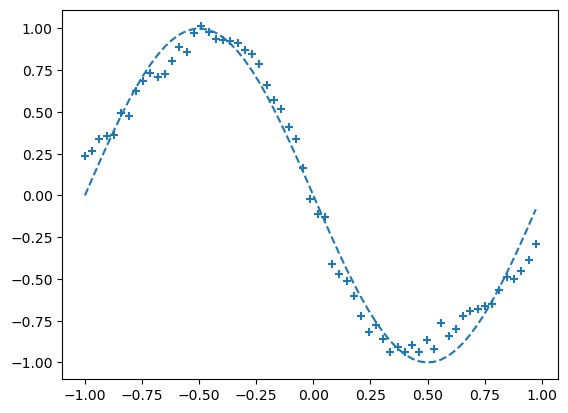

Epoch:600/2001 Error:0.00518906265019751


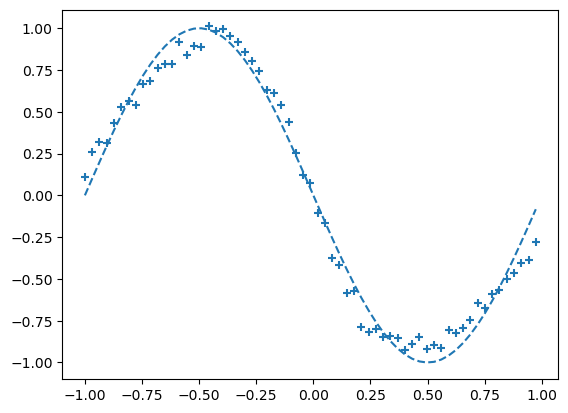

Epoch:800/2001 Error:0.004323983385078581


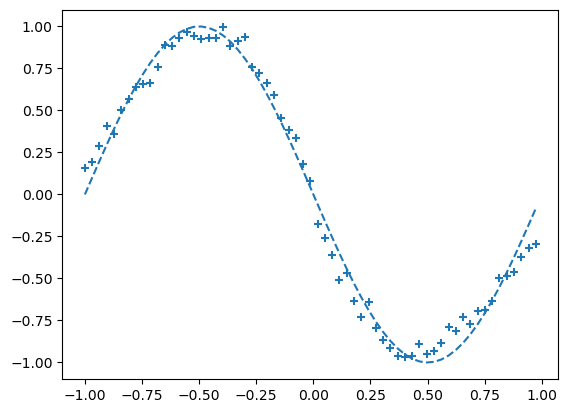

Epoch:1000/2001 Error:0.0033774006171997254


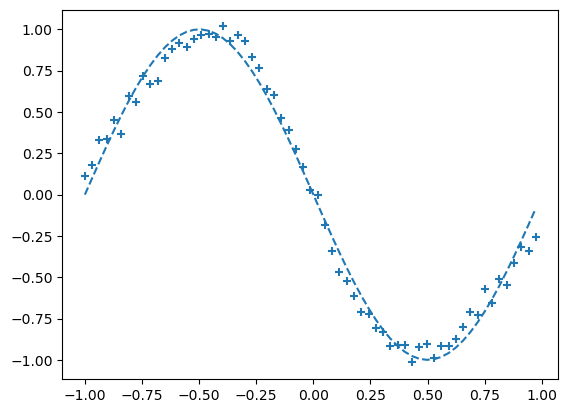

Epoch:1200/2001 Error:0.0029721095917066113


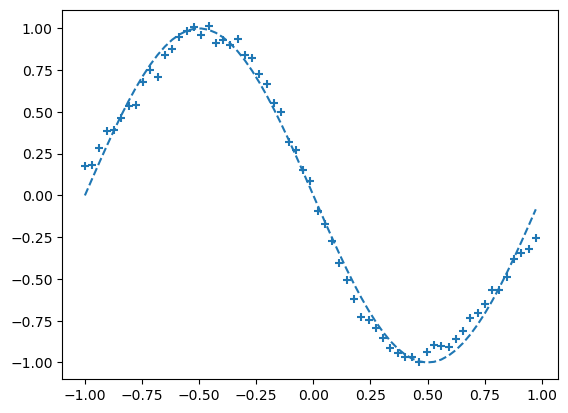

Epoch:1400/2001 Error:0.0021985638157048636


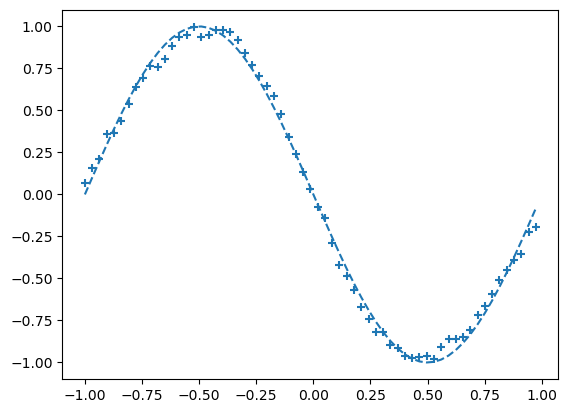

Epoch:1600/2001 Error:0.0010460199109897795


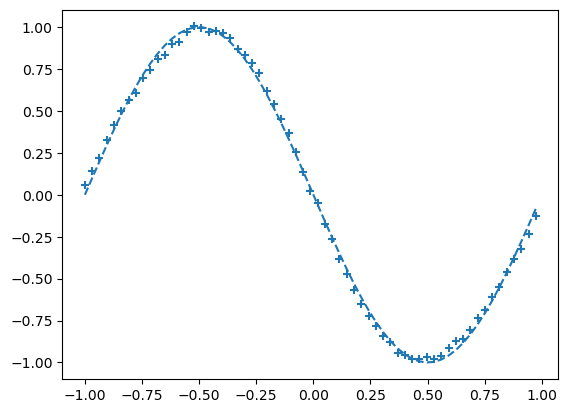

Epoch:1800/2001 Error:0.0004382800659924804


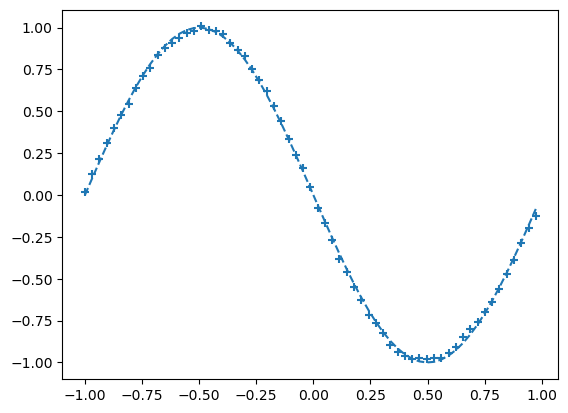

Epoch:2000/2001 Error:0.00014877240129073106


In [13]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi # 입력을 -1.0 ~ 1.0
n_data = len(correct_data)

# 초깃값 설정
n_in = 1 # 입력층의 뉴런 수
n_mid = 3 # 은닉층의 뉴런 수
n_out = 1 # 출력층의 뉴런 수

wb_width = 0.01
eta = 0.1 # 학습률 learning rate
epoch = 2001
interval = 200

# 각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

for i in range(epoch):
    
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
            
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)
            
            
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print("Epoch:"+str(i)+'/'+str(epoch), \
             "Error:"+str(total_error/n_data))

In [ ]:
# Middle Layer Neuron 수를 1, 2, 3, 4, 5, 로 증가=> 결과 확인 

- 3 또는 4개의 뉴런 이후에는 결과가 더 좋아지지 않고 , 계산량만 증가 
- 이 문제에서 은닉층에서 3 또는 4개의 뉴런이 최적 
- 은닉층에서 필요 이상의 뉴런 수는 과적합(overfitting)을 일으킴 